In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

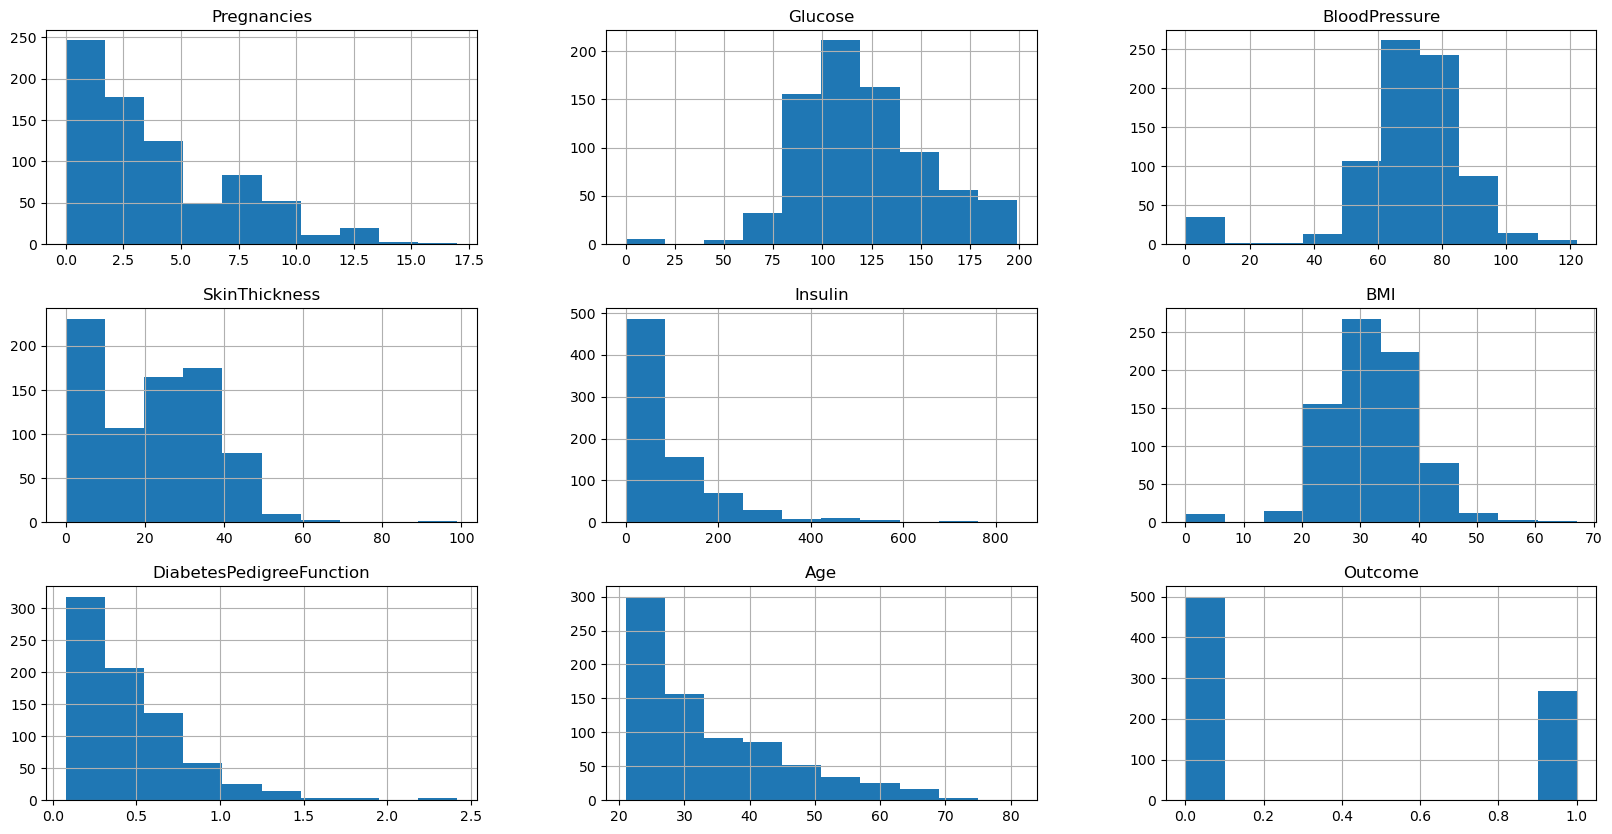

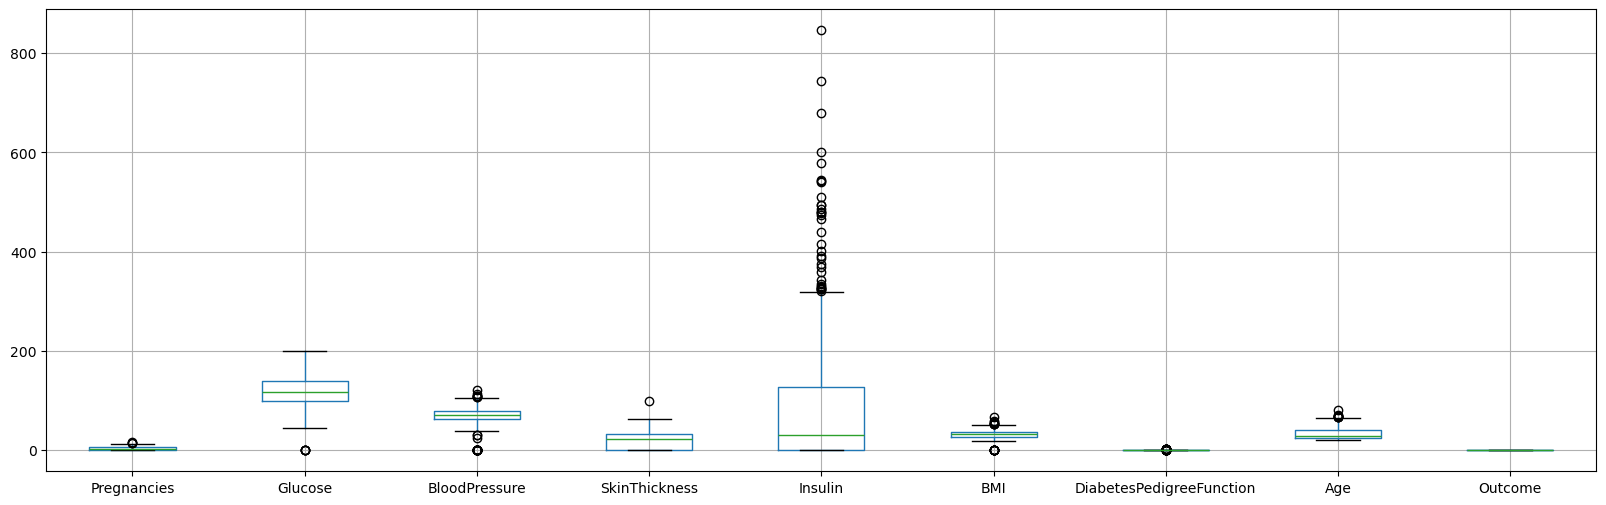

In [5]:
import matplotlib.pyplot as plt

# Histogram
df.hist(figsize=(20, 10))
plt.show()

# Boxplot
df.boxplot(figsize=(20, 6))
plt.show()


#İnsulin değişkeni için min-max normalizasyonu yapmak

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# CSV'den veri yükleme
df = pd.read_csv("diabetes.csv")

# Min-Max Normalizasyonu için bir kopya oluştur
df_copy = df.copy()

# Min-Max Normalizasyonu
scaler_minmax = MinMaxScaler()
df_copy['Insulin_MinMax'] = scaler_minmax.fit_transform(df_copy[['Insulin']])

# Orijinal sütunları yeni kopyadan sil
df_copy.drop(columns=['Insulin'], inplace=True)

# Güncellenmiş kopyayı ayrı bir dosyaya kaydet
df_copy.to_csv("normalized_minmax_data.csv", index=False)




In [5]:
data = pd.read_csv("normalized_minmax_data.csv")

data.head()
 

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_MinMax
0,6,148,72,35,33.6,0.627,50,1,0.000000
1,1,85,66,29,26.6,0.351,31,0,0.000000
2,8,183,64,0,23.3,0.672,32,1,0.000000
3,1,89,66,23,28.1,0.167,21,0,0.111111
4,0,137,40,35,43.1,2.288,33,1,0.198582


#Normalizasyon yapılan veri seti üzerinde makine öğrenmesi yapılması

Model Performansları:

KNN:
  Doğruluk: 0.7013
  F1-Skoru: 0.5893
  Duyarlılık (Recall): 0.6000
  Özgüllük (Specificity): 0.7576

Random Forest:
  Doğruluk: 0.7720
  F1-Skoru: 0.6607
  Duyarlılık (Recall): 0.6727
  Özgüllük (Specificity): 0.7980

SVM:
  Doğruluk: 0.7727
  F1-Skoru: 0.6465
  Duyarlılık (Recall): 0.5818
  Özgüllük (Specificity): 0.8788


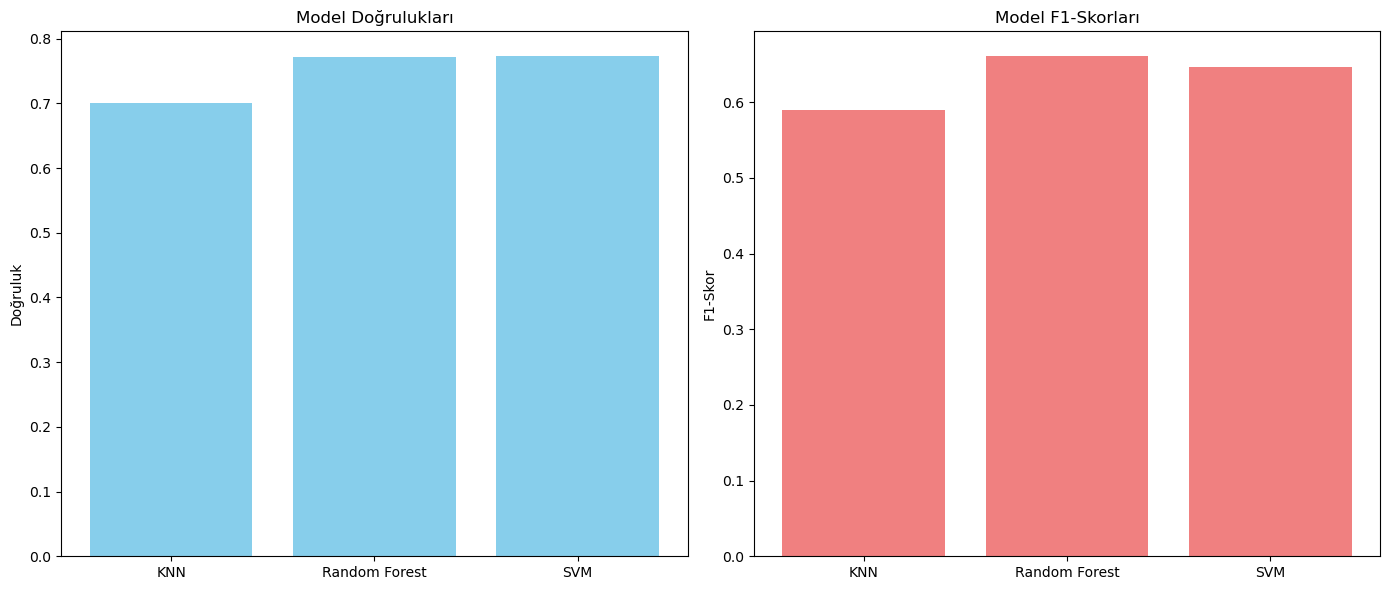

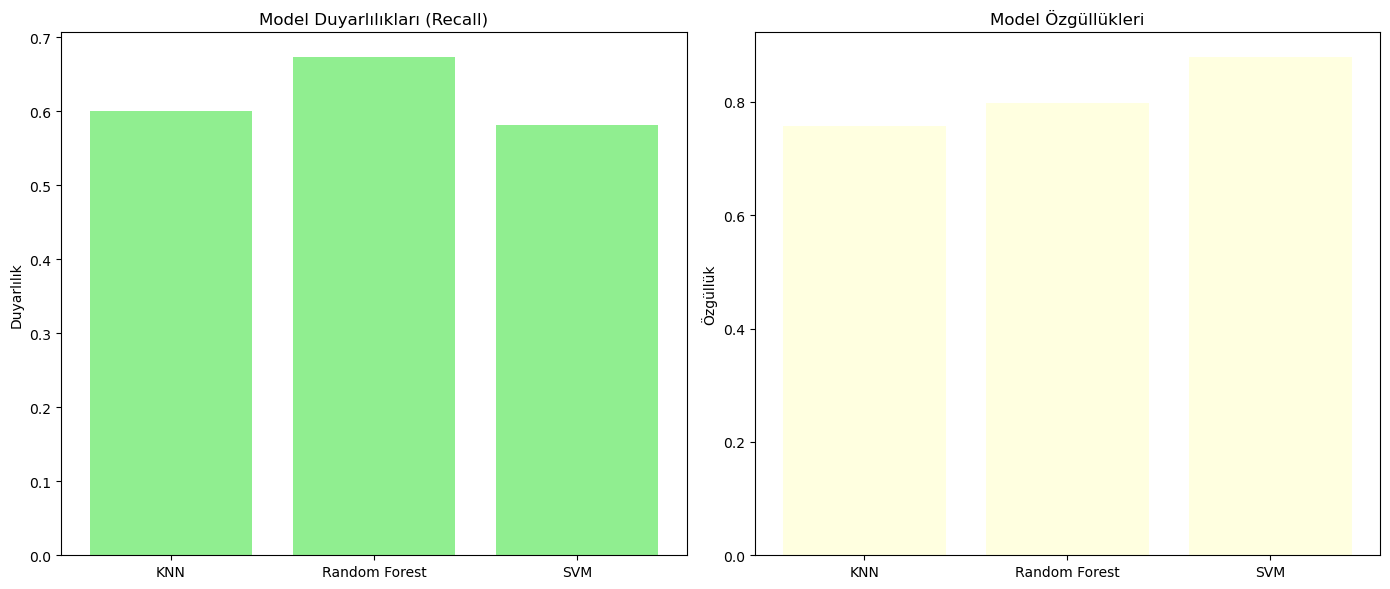

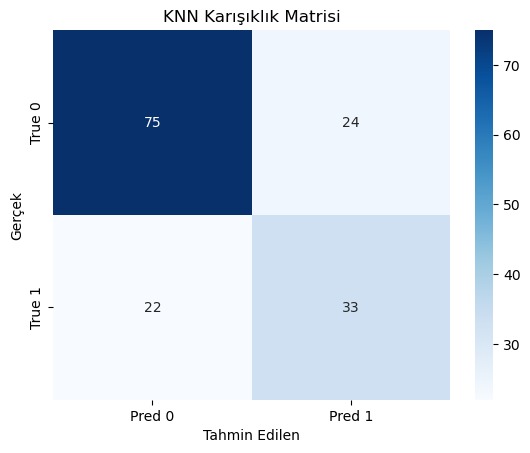

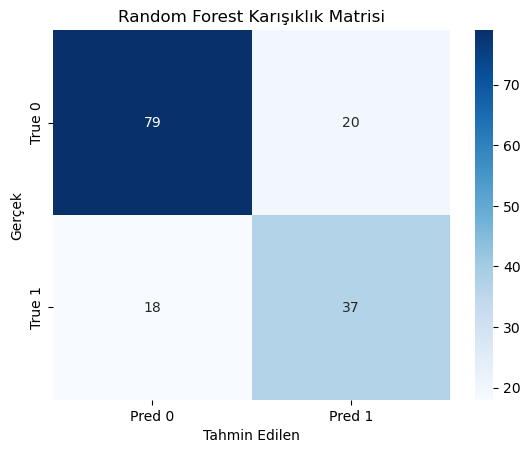

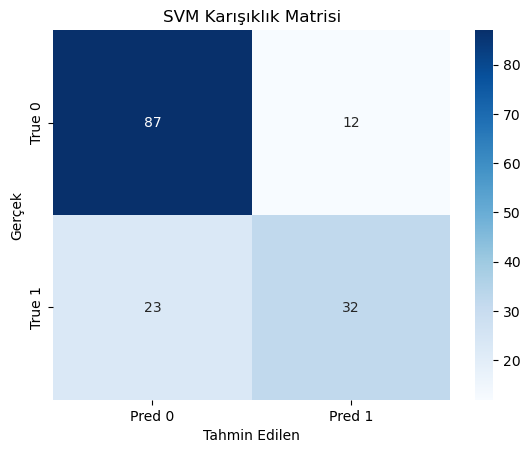

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# CSV'den veri yükleme
df = pd.read_csv("normalized_minmax_data.csv")

# Özellikler ve hedef
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Eğitim ve test verisi olarak ayırma (Test verisi sadece sonuçları değerlendirmek için kullanılacak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-fold çapraz doğrulama ayarları (K=5) sadece bir modelde kullanılacak
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 1. K-Nearest Neighbors (KNN) - K-fold kullanmadan
knn_model = KNeighborsClassifier(n_neighbors=5)  # KNN modelini oluşturuyoruz
knn_model.fit(X_train, y_train)  # Modeli eğitme
knn_pred = knn_model.predict(X_test)  # Test verisi ile tahmin yapma
knn_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
knn_accuracy = accuracy_score(y_test, knn_pred)  # Doğruluk skoru
knn_conf_matrix = confusion_matrix(y_test, knn_pred)  # Karışıklık matrisi
knn_class_report = classification_report(y_test, knn_pred, output_dict=True)  # Sınıflandırma raporu

# 2. Random Forest Classifier (Rastgele Orman) - K-fold doğrulama ile
rf_model = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')  # K-fold doğrulama
rf_mean_accuracy = np.mean(rf_cv_scores)  # Ortalama doğruluk
rf_model.fit(X_train, y_train)  # Modeli eğitme
rf_pred = rf_model.predict(X_test)  # Test verisi ile tahmin yapma
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
rf_conf_matrix = confusion_matrix(y_test, rf_pred)  # Karışıklık matrisi
rf_class_report = classification_report(y_test, rf_pred, output_dict=True)  # Sınıflandırma raporu

# 3. Support Vector Machine (SVM) - K-fold kullanmadan
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)  # Modeli eğitme
svm_pred = svm_model.predict(X_test)  # Test verisi ile tahmin yapma
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
svm_accuracy = accuracy_score(y_test, svm_pred)  # Doğruluk skoru
svm_conf_matrix = confusion_matrix(y_test, svm_pred)  # Karışıklık matrisi
svm_class_report = classification_report(y_test, svm_pred, output_dict=True)  # Sınıflandırma raporu

# Sonuçları yazdırma
models = ['KNN', 'Random Forest', 'SVM']
accuracies = [knn_accuracy, rf_mean_accuracy, svm_accuracy]
f1_scores = [knn_class_report['1']['f1-score'], rf_class_report['1']['f1-score'], svm_class_report['1']['f1-score']]
recalls = [knn_class_report['1']['recall'], rf_class_report['1']['recall'], svm_class_report['1']['recall']]
specificities = [knn_conf_matrix[0, 0] / np.sum(knn_conf_matrix[0]), 
                 rf_conf_matrix[0, 0] / np.sum(rf_conf_matrix[0]), 
                 svm_conf_matrix[0, 0] / np.sum(svm_conf_matrix[0])]

# Sayısal değerleri yazdırma
print("Model Performansları:")
for i, model in enumerate(models):
    print(f"\n{model}:")
    print(f"  Doğruluk: {accuracies[i]:.4f}")
    print(f"  F1-Skoru: {f1_scores[i]:.4f}")
    print(f"  Duyarlılık (Recall): {recalls[i]:.4f}")
    print(f"  Özgüllük (Specificity): {specificities[i]:.4f}")

# Grafik 1: Doğruluk ve F1-skoru
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Doğruluk grafiği
ax[0].bar(models, accuracies, color='skyblue')
ax[0].set_title('Model Doğrulukları')
ax[0].set_ylabel('Doğruluk')

# F1-skoru grafiği
ax[1].bar(models, f1_scores, color='lightcoral')
ax[1].set_title('Model F1-Skorları')
ax[1].set_ylabel('F1-Skor')

plt.tight_layout()
plt.show()

# Grafik 2: Duyarlılık (Recall) ve Özgüllük (Specificity)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Duyarlılık grafiği
ax[0].bar(models, recalls, color='lightgreen')
ax[0].set_title('Model Duyarlılıkları (Recall)')
ax[0].set_ylabel('Duyarlılık')

# Özgüllük grafiği
ax[1].bar(models, specificities, color='lightyellow')
ax[1].set_title('Model Özgüllükleri')
ax[1].set_ylabel('Özgüllük')

plt.tight_layout()
plt.show()

# Grafik 3: Karışıklık Matrisi
def plot_conf_matrix(conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'{model_name} Karışıklık Matrisi')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

plot_conf_matrix(knn_conf_matrix, 'KNN')
plot_conf_matrix(rf_conf_matrix, 'Random Forest')
plot_conf_matrix(svm_conf_matrix, 'SVM')
